In [1]:
using Plots; 
using PlotThemes;
theme(:orange)

In [15]:
###variable declarations
nx = 41
ny = 41
nt = 500
dx  = 2 / (nx - 1)
dy  = 2 / (ny - 1)

σ  = 0.0009

# decrease value of ν to see stronger convection
# increase value of ν to see weaker convection
ν = 0.001
dt = σ * dx * dy / ν

x = range(0, stop = 2, length = nx)
y = range(0, stop = 2, length = ny)

un = ones(ny, nx, nt)
vn = ones(ny, nx, nt)

###Assign initial conditions
un[0.5 .<= y .<= 1, 0.5 .<= x .<= 1, 1] .= 2;
vn[0.5 .<= y .<= 1, 0.5 .<= x .<= 1, 1] .= 2;

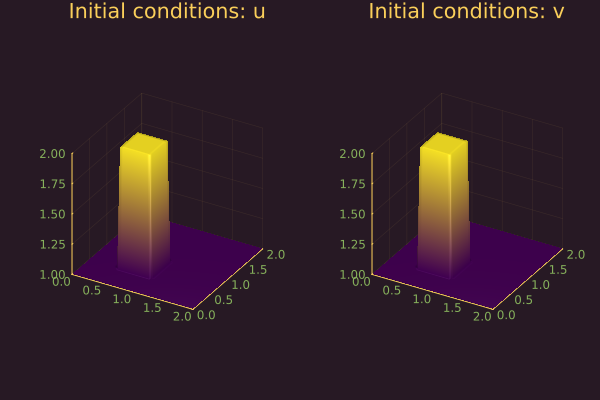

In [16]:
### plot initial conditions un and vn
# plot un
plot_u = surface(x, y, un[:,:,1], title = "Initial conditions: u", colorbar = false)

# plot vn
plot_v = surface(x, y, vn[:,:,1], title = "Initial conditions: v", colorbar = false)

# plot layout
l = @layout [a b]
plot(plot_u, plot_v, layout = l)

In [17]:
### solve 2D Burger's equation for time steps
for n in 1:nt-1, j in 2:ny-1, i in 2:nx-1
    un[j, i, n+1] = un[j, i, n] - 
                    un[j, i, n] * dt / dx * (un[j, i, n] - un[j, i-1, n]) - 
                    vn[j, i, n] * dt / dy * (un[j, i, n] - un[j-1, i, n]) + 
                    ν * dt / dx^2 * (un[j, i+1, n] - 2 * un[j, i, n] + un[j, i-1, n]) + 
                    ν * dt / dy^2 * (un[j+1, i, n] - 2 * un[j, i, n] + un[j-1, i, n])
    vn[j, i, n+1] = vn[j, i, n] -
                    un[j, i, n] * dt / dx * (vn[j, i, n] - vn[j, i-1, n]) -
                    vn[j, i, n] * dt / dy * (vn[j, i, n] - vn[j-1, i, n]) +
                    ν * dt / dx^2 * (vn[j, i+1, n] - 2 * vn[j, i, n] + vn[j, i-1, n]) +
                    ν * dt / dy^2 * (vn[j+1, i, n] - 2 * vn[j, i, n] + vn[j-1, i, n])
end

┌ Info: Saved animation to /tmp/jl_j45IVmBsbk.gif
└ @ Plots /home/fuad/.julia/packages/Plots/io9zQ/src/animation.jl:156


Plots.AnimatedGif("/tmp/jl_j45IVmBsbk.gif")
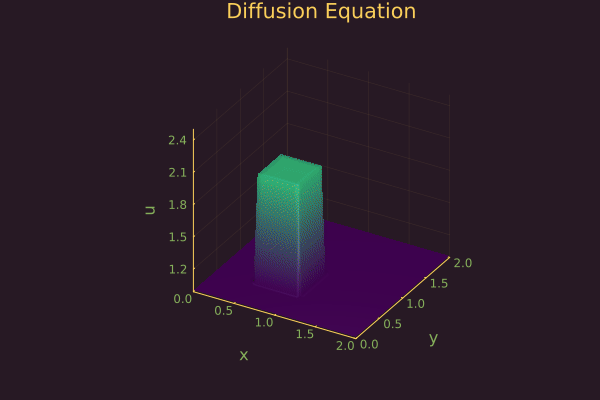

In [18]:
### plot a 3D surface animation of the solution un
@gif for n in 1:nt
    plot(x, y, un[:, :, n], st = :surface, title = "Burger's Equation", 
    xlabel = "x", ylabel = "y", zlabel = "u", colorbar = false,
    zlims = (0.99, 2.5))
end

┌ Info: Saved animation to /tmp/jl_JkpoJS5EnS.gif
└ @ Plots /home/fuad/.julia/packages/Plots/io9zQ/src/animation.jl:156


Plots.AnimatedGif("/tmp/jl_JkpoJS5EnS.gif")
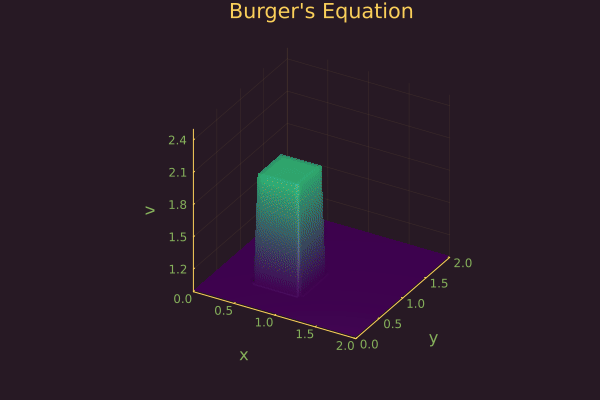

In [20]:
# plot a 3D surface animation of the solution vn
@gif for n in 1:nt
    plot(x, y, vn[:, :, n], st = :surface, title = "Burger's Equation", 
    xlabel = "x", ylabel = "y", zlabel = "v", colorbar = false,
    zlims = (0.99, 2.5))
end